## Michelle Kouba
## Predicting Diabetes with 99.4% accuracy
## A Random Forest Analysis

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score
# Turning off warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the "Early Stage Diabetes Risk Prediction Dataset" saved to the working directory.
df = pd.read_csv("Diabetes_Bangladesh.csv")

In [ ]:
# Finding the shape of the dataframe and the total number of records = 520 records and 17 variables
df.shape

(520, 17)

In [ ]:
# Looking for missing values and names of the variables.
# Note that no data is missing values.
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
# Function to recode binary variables to numeric "dummy variables", Yes=1, No=0.
def recode_Yes (cell):
    if cell == 'Yes':
        return 1
    else:
        return 0
# Function to recode Diabetes, Positive(for Diabetes)=1, No=0.
def recode_Diabetes (cell):
    if cell == 'Positive':
        return 1
    else:
        return 0

# Function to recode Gender, Male=1, Female=0.
def recode_Gender (cell):
    if cell == 'Male':
        return 1
    else:
        return 0

# Recoding binary numeric values to categorical
df['Gender'] = df['Gender'].apply(recode_Gender)
df['class'] = df['class'].apply(recode_Diabetes)
df['Polyuria'] = df['Polyuria'].apply(recode_Yes)
df['Polydipsia'] = df['Polydipsia'].apply(recode_Yes)
df['sudden weight loss'] = df['sudden weight loss'].apply(recode_Yes)
df['weakness'] = df['weakness'].apply(recode_Yes)
df['Polyphagia'] = df['Polyphagia'].apply(recode_Yes)
df['Genital thrush'] = df['Genital thrush'].apply(recode_Yes)
df['visual blurring'] = df['visual blurring'].apply(recode_Yes)
df['Itching'] = df['Itching'].apply(recode_Yes)
df['Irritability'] = df['Irritability'].apply(recode_Yes)
df['delayed healing'] = df['delayed healing'].apply(recode_Yes)
df['partial paresis'] = df['partial paresis'].apply(recode_Yes)
df['muscle stiffness'] = df['muscle stiffness'].apply(recode_Yes)
df['Alopecia'] = df['Alopecia'].apply(recode_Yes)
df['Obesity'] = df['Obesity'].apply(recode_Yes)

In [ ]:
# Describing the data
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([  3.,  60., 143., 116., 133.,  51.,  10.,   4.]),
 array([16.  , 25.25, 34.5 , 43.75, 53.  , 62.25, 71.5 , 80.75, 90.  ]),
 <BarContainer object of 8 artists>)

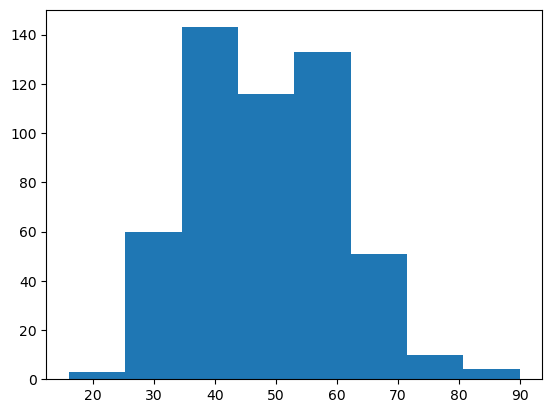

In [ ]:
# Looking at the distribution of age.
# Creating a histogram .
# Age is mostly normally distributed.  Has a little bit of a right tail but nothing extreme or to mark outliers.
plt.hist(df.Age, bins=8)

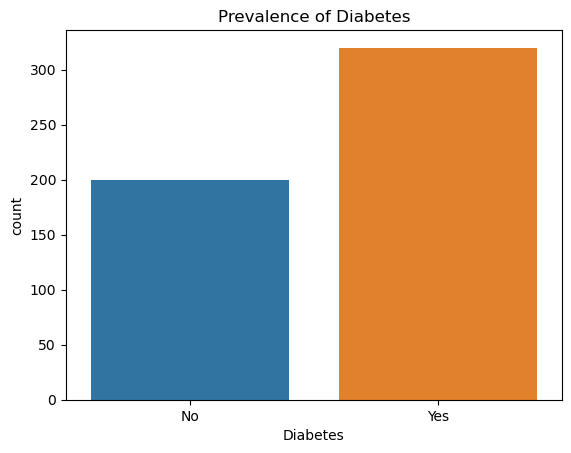

In [ ]:
# Checking to see if diabetics are balanced (about the same number of diabetics and non-diabetics in sample).
y = df['class']
legend = ['No', 'Yes']
sns.countplot(y)
bars = ('No', 'Yes')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Diabetes')
plt.title('Prevalence of Diabetes')
plt.show()

In [ ]:
print('The prevalence of diabetics in the datafile is :', round(df['class'].mean()*100,1))

The prevalence of diabetics in the datafile is : 61.5


In [ ]:
# Creating features.
# Dropping Polydipsia because it's highly correlated with Polyuria.
X = df.drop(['class', 'Polydipsia'],axis=1)
y = df['class']

In [ ]:
# Splitting the dataset into the training set and the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Creating a pipline for the data to scale the data (MinMaxScaler) and run multiple
# Analyses and fit the best model to the data (multiple settings for each analyses).
# The analyses I will be trying to fit are logistic regression, KNN analyses, and a
# random forest analyses.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Creating the MinMaxScaler
min_max_scaler = MinMaxScaler()
# Creating the search space for the analyses specifying these above analyses and
# settings.
search_space = [{'classifier': [LogisticRegression(solver='lbfgs', max_iter=5000)],
               'classifier__penalty': ['l2'],
               'classifier__C': np.logspace(0,4,10)},
               {'classifier': [RandomForestClassifier()],
               'classifier__n_estimators': [10, 100, 1000],
               'classifier__max_features': [3, 5, 10, 20]},
               {'classifier__n_neighbors': list(range(1,11,1)),
                'classifier__weights': ['uniform', 'distance']}]
# Creating pipeline
pipe = Pipeline([('min_max_scaler', MinMaxScaler()),
                    ('classifier', KNeighborsClassifier())])
# Creating the grid search for the analyses using the above search space.
# I might change the scoring from accuracy to something different per instructor's
# guidance that accuracy might be the best fit due to the small number of diabetes = yes.
grid_search = GridSearchCV(pipe, search_space, cv = 5, scoring = 'accuracy', verbose = 1)

In [ ]:
# Running the three analyses simultaneously with different settings to find the best fit for the
# training data
best_model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [ ]:
# Printing the best fit analyses with the parameter that fit the best
best_model.best_estimator_.get_params()['classifier']

RandomForestClassifier(max_features=3, n_estimators=1000)

# Random Forest Model Fit Analyses

The model that fit the best is Random Forest analyses.

In [ ]:
from sklearn import metrics
rfc_train = best_model.predict(X_train)

In [ ]:
# Using this model with the above parameters to predict the test data outcomes (diabetes yes/no)
y_test_pred = best_model.predict(X_test)

In [ ]:
# Finding the accuracy of the model (the y_test diabetes yes/no versus the predicted diabetes outcome)
from sklearn import metrics
print('The accuracy of the testing model is', round(metrics.accuracy_score(y_test, y_test_pred),2*100),'%')

The accuracy of the testing model is 0.9871794871794872 %


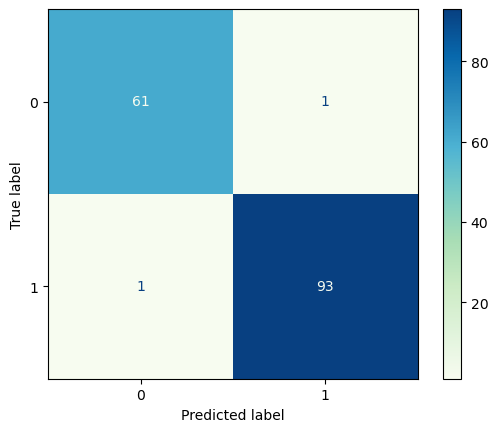

In [ ]:
# Charting a confusion matrix.
from sklearn import metrics
confusion_matrix_log = metrics.plot_confusion_matrix(best_model, X_test, y_test, cmap = "GnBu")
print(confusion_matrix_log)

The model was accurately able to predict 93 of the 94 diabetics in the test file.  Similarly, it was able to correctly identify 61 of 62 non-diabetics.  

In [ ]:
# Inspect the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.99      0.99      0.99        94

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



Precision is the ability of the model not to label a diabetic if they are indeed non-diabetic (which is 98%).  Recall is the intuitively of the model to find all the diabetics (99%).  The f1 score is a weighted harmonic mean of both precision and recall (99%).

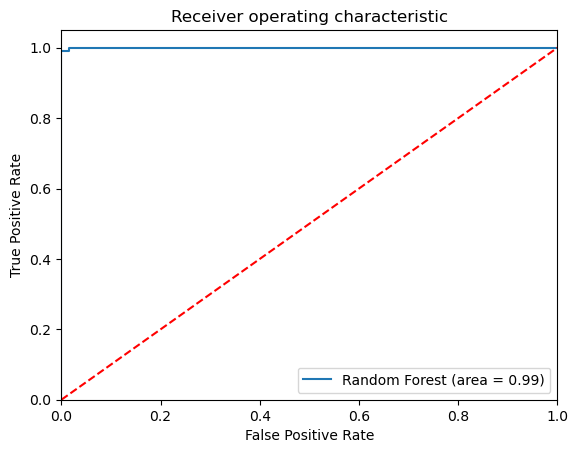

In [ ]:
# Using the ROC curve of the model to see the fit of the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logit_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic or (ROC) curve is another common tool in order to test the goodness of fit for a model with a binary classifier such as diabetes.  The dotted line represents the ROC curve of anything appearing at random (slope=1 which makes sense).  A good classifier model will stay as far away from that line as possible and head towards the top left corner (which makes sense since you are trying to max true positive rates).  This model does a great job accurately predicting diabetes vs non-diabetics.

# Feature Importance

In [ ]:
# Random Forest from the best model
# <odel with 1000 decision trees
rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, min_samples_split=2, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Text(0.5, 1.0, 'Visualization of the Important Features')

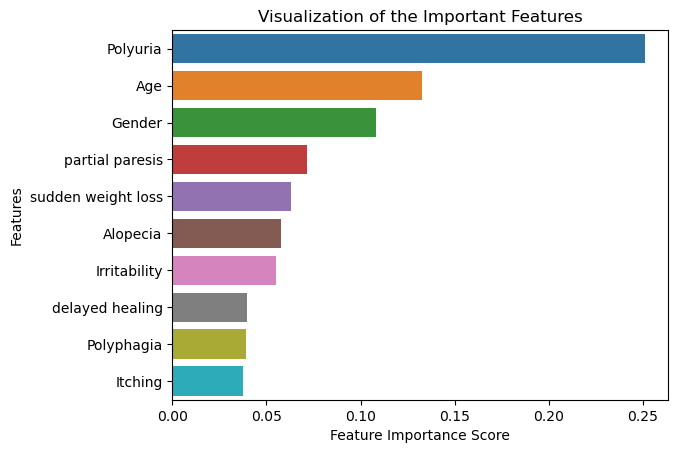

In [ ]:
# Using feature importance to see which variables are the most important to
# this prediction model
FeatureImport = pd.Series(rf.feature_importances_, index=X_train.columns)
FeatureImport.sort_values(ascending=False, inplace=True)
# Visualize the feature importance
# Creating a bar plot
import seaborn as sns
sns.barplot(x = FeatureImport.head(10), y = FeatureImport.head(10).index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization of the Important Features")